# RV and Transit for HD209458 b continued
## Using RV and transit data to estimate mass and radius of planet and calculating uncertainty

### Import necessary packages and data tables for RV and transit

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import astropy.io.ascii
plt.ion()
%matplotlib inline

In [2]:
#tr_data = astropy.io.ascii.read("UID_0108859_PLC_003.tbl.txt", data_start=131, delimiter='|')
#data for HD209458 b transit data 
#data from Exoarchive Optical(Most) Rowe et al 2006
#data starts at line 130

In [3]:
rv_data = astropy.io.ascii.read("UID_0108859_RVC_002.tbl.txt")
#laughlin et al 2006, used 10m Keck 1 HIRES
#rv data for HD209458 b

In [4]:
lc_data = astropy.io.ascii.read("lightcurve.txt")
t = rv_data["HJD"].data

In [5]:
rv_data2 = astropy.io.ascii.read("24Sextantisc.txt")

## Calculate Mass of HD 209458 b from RV data

In [6]:
#we need mass_star, rv_semi_amplitude, eccentricity, semi_maj_axis, 
#and assume circular orbit to find minmass_planet in terms of mass_star?
#mass_star = 1.06917519587500 solar masses
#rv_semi_amplitude = max RV-min RV/2 = 91.9-(-86.9)/2 = 89.4 m/s
#semi_maj_axis from rosenthal et al 2021 = 0.04634+0.00069-0.00070 AU = 6932365328 meters
#period = 3.52474859 days (not needed)
#eccentricity = 0.01

semimaj_axis_AU = 0.04634 #semi major axis in AU
K_ms = 89.4 #rv semi amplitude in m/s
m_star_sol= 1.06917519587500 #mass of star in solar masses
ecc=0.01 #eccentricity

#semiamplitude eqn
#K~28.4ms^-1(a/AU)^(-1/2)(msini/Mj)(Mstar/Msun)^(-1/2)(1-e^2)^(-1/2)
#solve for msini
#msini = K*(1/28.4ms^-1)(AU/a)^(-1/2)(Msun/Mstar)^(-1/2)(1/(1-e^2))^(-1/2) 
#^minimum mass in jupiter masses

min_mass = K_ms*(1/28.4)*(1/semimaj_axis_AU)**(-1/2)*(1/m_star_sol)**(-1/2)*(1/(1-(ecc)**2))**(-1/2)

print('The minimum mass of HD 209458 b is', min_mass, 'Jupiter masses')


The minimum mass of HD 209458 b is 0.700648045897449 Jupiter masses


## Calculate the Radius from the transit data

In [7]:
#plt.plot(lc_data['HJD'].data, lc_data['Relative_Flux'].data, 'ok')

In [8]:
#radius using light curve data
td = .0150 #(based on light curve data)
Rs = 11.667659 #Rj
Rp = td**(1/2) * Rs

print('The radius of the planet is', Rp, 'Rj')

The radius of the planet is 1.4289905521395916 Rj


In [9]:
Rj=6.9911e+7 #radius of jupiter in meters https://solarsystem.nasa.gov/planets/jupiter/by-the-numbers/

#define maxes and min for each value
tdmax=(3.072+0.003)/23.933 #max duration in days
pdmax=3.52476+1.30000 #max period in days
admax=(0.04634+0.00069)*1.496e+11 #max semi maj axis in meters

tdmin=(3.072-0.003)/23.933 #max duration in days
pdmin=3.52476-1.30000 #max period in days
admin=(0.04634-0.00070)*1.496e+11 #max semi maj axis in meters


#calculate max bound using largest possible values for ad and td and min pd


Rpmax = (np.pi*((admax*tdmax)/pdmin))/Rj #max Radius of planet in meters
print('The max radius of HD 209458 b is', Rpmax, 'Rj')

#calculate min with smallest ad and td and largest pd

Rpmin = (np.pi*((admin*tdmin)/pdmax))/Rj #min Radius of planet in meters
print('The minimum radius of HD 209458 b is', Rpmin, 'Rj')

The max radius of HD 209458 b is 18.258947607325776 Rj
The minimum radius of HD 209458 b is 8.15465553263589 Rj


In [10]:
#our error on the top bound is 

errorpos= Rpmax-Rp #top bound for error
errormin= Rp-Rpmin #lower bound for error

print( errorpos, errormin)

16.829957055186185 -6.725664980496298


### The radius of HD 209458 b is around 11.345+6.9144/-3.1899

In [11]:
percerrorp=errorpos/Rp*10
percerrorm=errormin/Rp*10

print('percent error? (positive then negative)',percerrorp,percerrorm)

percent error? (positive then negative) 117.77514574877429 -47.06584637964281


# Calculate density from Radius and Mass

In [28]:
#density is mass/volume
#volume of sphere is 4/3Pi Radius^3
#here i am not accounting for error/uncertainty for mass calculations

# use mass = min_mass from the RV method above
#use rad = Rp from analytical transit calculations above
#note both of these are in Mj and Rj respectively, so the denisty will be in density of Jup

Rpm=Rp*Rj #radius in meters
Rpmaxm= Rpmax*Rj
Rpminm = Rpmin*Rj

Vol = (4/3)*np.pi*(Rpm)**3     #vol in cubic meters
Volmin = (4/3)*np.pi*(Rpminm)**3 #minimum vol
Volmax = (4/3)*np.pi*(Rpmaxm)**3   #maximum vol

print('Volume=', Vol, 'Volmin=', Volmin, 'Volmax=', Volmax, 'in cubic meters')

Mj = 1.89813e+27 #mass of jupiter in kg https://solarsystem.nasa.gov/planets/jupiter/by-the-numbers/

min_mass_kg = min_mass*Mj

Dens = min_mass_kg/Vol #density in kg/m^3 

print('The density of the planet is', Dens, 'in kg per cubic meter')

Densmin = min_mass_kg/Volmax #min density kg per cubic meter
Densmax = min_mass_kg/Volmin #max desnity kg per cubic meter

print('min density is', Densmin, 'max density is', Densmax, 'in kg per cubic meter')

#this appear to be very far off of the calculated values on NEA...could be our mass values?

Volume= 4.1765071039185625e+24 Volmin= 7.761434795347497e+26 Volmax= 8.712692357142277e+27 in cubic meters
The density of the planet is 318.42902269016633 in kg per cubic meter
min density is 0.15264180357167265 max density is 1.7134989991238874 in kg per cubic meter


In [14]:
#error range: this is not accounting for RV, mass error

errordmin = Dens-Densmin #lower error for density
errordplus = Densmax-Dens #higher errror

print('error', errordmin, errordplus)

error 318.27638088659467 -316.71552369104245


In [15]:
print('The density is', Dens, '+', errordplus, '/-', errordmin, 'in kg/m^3')

The density is 318.42902269016633 + -316.71552369104245 /- 318.27638088659467 in kg/m^3


In [16]:
#percent error

percerrorm = errordmin/Dens*10 #percent error for min
percerrorp = errordplus/Dens*10 #percent error for max

print('percent error', percerrorm, percerrorp)

percent error 9.995206410449583 -9.946188981624607


In [17]:
from matplotlib import pyplot as plt
import matplotlib 
import numpy as np

### Uncertainty

In [18]:
Ks = 84.7
σKs = 0.00826
Ms = 1119.8544
σMs = 0.0449
Mp = min_mass

σMp = (4/9 * (σMs/Ms)**2 + (σKs/Ks)**2)**(1/2) * Mp

print('The uncertainty of mass is', σMp)

The uncertainty of mass is 7.084779802663949e-05


In [19]:
#radius uncertainty
σRs = 0.017
σtd = 0.0016
td = 1.50

σRp = ((σRs/Rs)**2 + 1/4 * (σtd/td)**2)**(1/2) * Rp

print('The uncertainty of the radius is', σRp)

The uncertainty of the radius is 0.002217169262198656


In [20]:
#mass uncertainty
σMp = 0.0548
Mp = min_mass
p = 0.50768

σp = ((σMp/Mp)**2 + 9 * (σRs/Rs)**2 + 9/4 * (σtd/td)**2)**(1/2) * p

print('The uncertainty of density is', σp)

The uncertainty of density is 0.039777586122677865


### Comparison

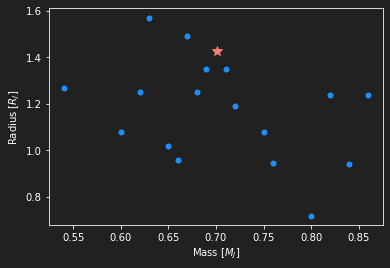

In [25]:
x1 = 0.700648045897449
y1 = Rp
d1 = 0.50768

#Similar exoplanets
x = [ 0.86, 0.72, 0.71, 0.75, 0.76, 0.69, 0.68, 0.67, 0.66, 0.65, 0.54, 0.63, 0.62, 0.60, 0.8, 0.82, 0.84]
     #Jupiter masses
y = [ 1.24, 1.19, 1.35, 1.08, 0.944, 1.35, 1.25, 1.49, 0.96, 1.017, 1.27, 1.57, 1.25, 1.08, 0.72, 1.24, 0.94]
     #Rj


pi = 3.14
d = [ m / (4/ (3 * pi * r**3)) for m, r in zip(x, y) ]

plt.style.use('dark_background')
plt.figure(facecolor='#212121') 
ax = plt.axes()
ax.set_facecolor("#212121")
plt.plot(x1, y1, '*', markersize = 10, color = 'salmon')
plt.plot(x, y, '.', markersize = 10, color = 'dodgerblue')
plt.xlabel('Mass [$M_J$]')
plt.ylabel('Radius [$R_J$]')
plt.savefig('polulation.png', dpi=300)

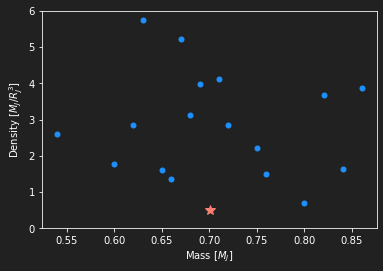

In [26]:
plt.figure(facecolor='#212121') 
ax = plt.axes()
ax.set_facecolor("#212121")
plt.plot(x1, d1, '*', markersize = 10, color = 'salmon')
plt.plot(x, d, '.', markersize = 10, color = 'dodgerblue')
plt.ylim(0, 6)
plt.xlabel('Mass [$M_J$]')
plt.ylabel('Density [$M_J / R_J^{3}$]')
plt.savefig('polulation2.png', dpi=300)